<span style="color:violet">

# MICROSOFT MOVIE STUDIO BUSINESS ANALYSIS
### BY :FLORENCE NGUUNI

![microsoft hollywood](PI_2.jpg)

<span style="color:violet">

#  PROJECT OVERVIEW

By developing a comprehensive project overview that covers these key areas, Microsoft can set up a movie studio that has a solid foundation for success.

1. **Project goal**
 
 The goal of the project is to establish a successful movie studio that produces high-quality content and effectively competes with existing studios.

2. **Scope**

The project will entail selecting a group of seasoned experts to run the studio, creating a distinct brand and strategy, investing in high-quality content, utilizing technology, and forming strategic alliances

3. **Deliverables**

The project's deliverables may include a thorough business plan, a marketing plan, a list of film projects, and the formation of important relationships.

4. **Risks and challenges**

The project may face difficulties such as hiring and retaining top talent in a cutthroat industry, unpredictable market demand, and competition from other studios. Microsoft needs to create backup plans to reduce these risks and handle unforeseen difficulties.



<span style="color:violet">


# BUSINESS PROBLEM




![business problem](PI_3.jpg)

- Analyzing the most popular and profitable genres to invest in

- Competition from existing and well-established movie studios

- Production cost vs. ROI 

- Analysis of the highest rated movie cast, specifically directors, in relation to the number of films produced and their average ratings
 

<span style="color:violet">

# DATA UNDERSTANDING


The data sets offered contain a wide range of data essential to understanding our business concerns. There are three selected data sets:

The im.db database, which provides information about movies and rating tables that emphasize various genres and show how popular they are according to the number of votes


The t.movie budget provides a breakdown of the expenses and returns of movies, which are arranged based on their overall box office performance relative to their production budget.

The bom movie gross that highlights the box office earnings of movies over a particular period of time

<span style="color:violet">

# DATA PREPATION AND ANALYSIS

In [164]:
#import the important libraries for my data cleaning and analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
cur = conn.cursor()
%matplotlib inline
conn = sqlite3.connect('im.db')

In [165]:
# This code executes a SQLite query to retrieve the names of all tables in the database.

cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [166]:
# This code uses pandas library to read data from iM.DB table called "movie_ratings" and stores it in a DataFrame named "df1" 
# Then displays the first 10 rows

df1 = pd.read_sql("""
SELECT *
  FROM movie_ratings;
""", conn)
df1.head (10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [167]:
# This code uses pandas library to read data from iM.DB table called "Movie_Basics" and stores it in a DataFrame named "df2" 
# Then displays the first 10 rows

df2 = pd.read_sql("""
SELECT *
  FROM movie_basics;
""", conn)
df2.head (10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [168]:
# The below code reads data from two tables "movie_basics" and "movie_ratings" from the database and stores it in DataFrame ("df3"). 
# The DataFrame is then displayed to show the result of the query.

df3 = pd.read_sql("""
        SELECT primary_title, start_year, genres, averagerating, numvotes
            FROM movie_basics AS MB
            JOIN movie_ratings AS MR
                ON MB.movie_id = MR.movie_id
            WHERE averagerating BETWEEN 6.5 AND 9 AND numvotes >10000
            ORDER BY numvotes DESC
            LIMIT 100;
""", conn)

df3

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,2012,"Drama,Western",8.4,1211405
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...
95,The Perks of Being a Wallflower,2012,Drama,8.0,422671
96,American Hustle,2013,"Crime,Drama",7.2,418221
97,Nightcrawler,2014,"Crime,Drama,Thriller",7.9,404476
98,Warrior,2011,"Drama,Sport",8.2,403755


In [169]:
# Determine if there are null values or not
null_values = df3.isna().sum().sum()
if null_values == 0:
    print ('There are {} null values'. format(null_values))
else:
        print ('There are {} null values'. format(null_values))

There are 0 null values


In [170]:
# Here we check for any duplicates
duplicates = []
for i in df3.duplicated():
    duplicates.append(i)
if len(set(duplicates)) == 1:
    print('There are no duplicate rows')
else: 
    print('There are {} duplicate rows'.format(df3.duplicated.value_counts().sum()))


There are no duplicate rows


In [171]:
#Find the top 5 most popular genre
# The ascending parameter to False is used to sort data in descending order.

df3['genres'].value_counts().sort_values(ascending=False).head(10)

Action,Adventure,Sci-Fi       24
Action,Adventure,Fantasy       8
Action,Adventure,Comedy        6
Action,Drama,Sci-Fi            3
Adventure,Animation,Comedy     3
Biography,Drama,History        2
Biography,Drama,Thriller       2
Adventure,Drama,Fantasy        2
Crime,Drama                    2
Drama,Mystery,Sci-Fi           2
Name: genres, dtype: int64

<span style="color:violet">

# DATA CLEANING: TMDB MOVIES CSV

In [172]:
# This code reads data from the CSV file named "tmdb.movies.csv" and stores it in a pandas DataFrame named "df". 
# Then displays the first 5 rows using the head method

df = pd.read_csv('tmdb.movies.csv', index_col=0)
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [173]:
# This returns the number of columns and rows
df.shape

(26517, 9)

In [174]:
# This gives a brief description of the data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [175]:
# This generates descriptive statistics of the numerical columns in the DataFrame. 
# The statistics that are generated include count, mean, standard deviation, minimum value, 25th percentile, median (50th percentile), 75th percentile, and maximum value.

df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [176]:
# This code returns the count of missing values (NaN) in each column of my DataFrame. 
# It is often used to identify columns that have missing data.

df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [177]:
# Df. duplicated returns a Boolean Series indicating whether each row is a duplicate of a previous row. 
# Value_ count method returns a count of the unique values in the Series

df.duplicated().value_counts()

False    25497
True      1020
dtype: int64

In [178]:
#dropping two columns: original_language and original_title
df = df.drop(['original_language', 'original_title'], axis=1)
df.head()

,genre_ids,id,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,27.920,2010-07-16,Inception,8.3,22186


In [179]:
# I confirmed that the two rows have been dropped by checking the dataframe shape
df.shape

(26517, 7)

In [180]:
#Changing the date from object into datetime format
from datetime import  datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes


genre_ids               object
id                       int64
popularity             float64
release_date    datetime64[ns]
title                   object
vote_average           float64
vote_count               int64
dtype: object

<span style="color:violet">

# DATA CLEANING: TN.MOVIE_BUDGET.CSV

In [181]:
# This code reads movie budget data from a CSV file into a Pandas DataFrame and displays the first few rows of the data.
# The index_col=0 parameter is used to set the first column of the CSV file as the index of the resulting Pandas DataFrame.

movies_budget = pd.read_csv('tn.movie_budgets.csv', index_col=0)
movies_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [182]:
# Determine the size of the DataFrame in terms of rows and columns.
movies_budget.shape


(5782, 5)

In [183]:
# This code calculates the number of missing values in each column of the movies_budget DataFrame
movies_budget.isna().sum()


release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [184]:
# This code calculates the number of duplicated and non-duplicated rows in the movies_budget DataFrame.

movies_budget.duplicated().value_counts()

False    5782
dtype: int64

In [185]:
#apply() method is used to apply a lambda function to each element of the specified columns of the movies_budget dataframe. 
#The lambda function takes a string input (x), removes the dollar sign and commas from it using the replace() method. 
# then converts the resulting string to a float data type using the float() function.

movies_budget['production_budget'] = movies_budget['production_budget'].apply(lambda x: float(x.replace('$', '').replace(',', '')))
movies_budget['domestic_gross'] =movies_budget['domestic_gross'].apply(lambda x: float(x.replace('$', '').replace(',', '')))
movies_budget['worldwide_gross'] = movies_budget['worldwide_gross'].apply(lambda x: float(x.replace('$', '').replace(',', '')))
movies_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [186]:
# This code removes the release_date column from the movies_budget DataFrame and assigns the resulting DataFrame back to the movies_budget variable.

movies_budget = movies_budget.drop(['release_date'], axis=1)
movies_budget

,movie,production_budget,domestic_gross,worldwide_gross
id,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09
2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...
78,Red 11,7000.0,0.0,0.000000e+00
79,Following,6000.0,48482.0,2.404950e+05
80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03


In [187]:
# ROI = (Gross Profit - Investment) / Investment * 100%, Where Gross Profit = Total Revenue - Production Budget
movies_budget['ROI'] = ((movies_budget['worldwide_gross'] - movies_budget['production_budget']) / movies_budget['production_budget']).round(2)

In [188]:
# This code displays the first 5 rows using the head method of the movies_budget DataFrame

movies_budget.head()

,movie,production_budget,domestic_gross,worldwide_gross,ROI
id,,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09,5.53
2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.55
3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-0.57
4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,3.24
5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,3.15


In [189]:
# Here I removed the first row(Deep Throat) since it was an outlier: The production cost was very low yet a very high return.
sorted_cost = movies_budget.sort_values(by = 'ROI', ascending= False).head(15).iloc[1:15]
sorted_cost

,movie,production_budget,domestic_gross,worldwide_gross,ROI
id,,,,,
14,Mad Max,200000.0,8750000.0,99750000.0,497.75
93,Paranormal Activity,450000.0,107918810.0,194183034.0,430.52
80,The Gallows,100000.0,22764410.0,41656474.0,415.56
7,The Blair Witch Project,600000.0,140539099.0,248300000.0,412.83
10,Super Size Me,65000.0,11529368.0,22233808.0,341.06
47,Bambi,858000.0,102797000.0,268000000.0,311.35
74,El Mariachi,7000.0,2040920.0,2041928.0,290.70
77,Night of the Living Dead,114000.0,12087064.0,30087064.0,262.92
11,Rocky,1000000.0,117235147.0,225000000.0,224.00


<span style="color:violet">

# DATA CLEANING: BOM.MOVIE_GROSS.CSV

In [190]:
# This code reads movie gross revenue data from a CSV file into a Pandas DataFrame and displays the first few rows of the data.

movie_gross = pd.read_csv('bom.movie_gross.csv')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [191]:
# This code displays a summary of the movie_gross DataFrame, providing useful information about its structure and contents.

movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [192]:
# This code calculates the percentage of missing values in each column of the movie_gross DataFrame. 
# This will be useful for identifying which columns have missing data and deciding how to handle those missing values.

movie_gross.isna().sum()/len(movie_gross)*100


title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [193]:
# This code helped me calculate the number of duplicated and non-duplicated rows in the movie_gross DataFrame.

movie_gross.duplicated().value_counts()

False    3387
dtype: int64

In [194]:
#This selects all the rows where the column_name(studio) is not null and assigns them back to the DataFrame movie_gross.
movie_gross.dropna(subset = ['domestic_gross'], axis =0, inplace = True)
movie_gross.drop('foreign_gross', axis=1, inplace= True )
movie_gross = movie_gross[movie_gross['studio'].notna()]
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [195]:
#pd.to_datetime() is a pandas method that converts a string or a series of strings into datetime objects.
movie_gross['year'] = pd.to_datetime(movie_gross['year'])
movie_gross.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3356 non-null   object        
 1   studio          3356 non-null   object        
 2   domestic_gross  3356 non-null   float64       
 3   year            3356 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 131.1+ KB


<span style="color:violet">

#  ANALYSIS OF COMPETITION IN THE MOVIE INDUSTRY

 In the below cells, I am going to do an analysis to determine the competition from existing and well-established movie studios in the industry that the Microsoft team might face with their entrance to the movie industry.

In [196]:
# This code snippet calculates the mean domestic gross revenue for each movie studio in the movie_gross DataFrame.
m_gross_grouping = movie_gross.groupby('studio')['domestic_gross'].mean()

In [197]:
#Assigned the m_gross_grouping into a new data frame(df_gross_grouping)
df_gross_grouping = pd.DataFrame(m_gross_grouping)
df_gross_grouping

,domestic_gross
studio,
3D,6.100000e+06
A23,8.210000e+04
A24,6.616208e+06
ADC,1.241000e+05
AF,3.571500e+05
...,...
XL,2.290000e+05
YFG,1.100000e+06
Yash,2.433185e+06


In [198]:
# Here I sorted the values in the column in a descending order and picked the first 10 rows in the data frame
df_gross_grouping.sort_values(by = 'domestic_gross', ascending= False).head(10)

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07
Fox,8.051103e+07
Sony,7.761177e+07
Par.,7.609773e+07
MGM,6.666667e+07


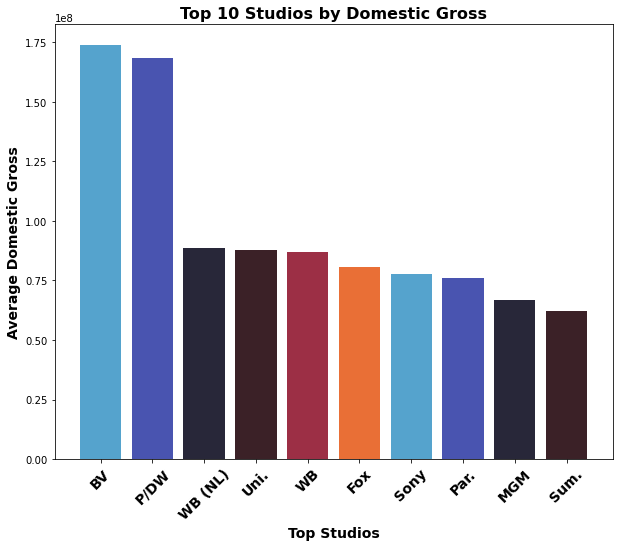

In [199]:
# Sort the groups by ascending domestic gross
top_studios = df_gross_grouping.sort_values(by = 'domestic_gross', ascending= False).head(10)

palette = sns.color_palette("icefire")
# Create a bar plot of the top 10 studios by domestic gross
plt.bar(top_studios['domestic_gross'].index, top_studios['domestic_gross'].values, color= palette, width=0.8)
plt.xticks(rotation=45, fontsize=14, fontweight='bold')
plt.xlabel("Top Studios", fontsize=14,fontweight='bold')
plt.ylabel("Average Domestic Gross", fontsize=14, fontweight='bold')
plt.title("Top 10 Studios by Domestic Gross", fontsize=16, fontweight='bold')


#Here is set the size of the current figure to be 10 inches by 8 inches in Matplotlib, which can be useful for adjusting the aspect ratio of the plot.
plt.gcf().set_size_inches(10, 8)
plt.show()

<span style="color:violet">

# Explanation of my finding from the above graph.


- From the graph above, BV and P/DW are the top 2 studios with the highest average domestic gross hence the highest market share.
- Also, MGM and Sum are the bottom 2 studios with the lowest average domestic gross hence the least market share.

<span style="color:violet">

# ANALYSIS OF THE COST OF PRODUCTION VS THE ROI

#### Here I am plotting a line graph plotted: ROI against the production budget

In [200]:
# Using the sorted cost DataFrame since I already dropped the outlier
sorted_cost = movies_budget.sort_values(by = 'ROI', ascending= False).head(15).iloc[1:15]
sorted_cost

,movie,production_budget,domestic_gross,worldwide_gross,ROI
id,,,,,
14,Mad Max,200000.0,8750000.0,99750000.0,497.75
93,Paranormal Activity,450000.0,107918810.0,194183034.0,430.52
80,The Gallows,100000.0,22764410.0,41656474.0,415.56
7,The Blair Witch Project,600000.0,140539099.0,248300000.0,412.83
10,Super Size Me,65000.0,11529368.0,22233808.0,341.06
47,Bambi,858000.0,102797000.0,268000000.0,311.35
74,El Mariachi,7000.0,2040920.0,2041928.0,290.70
77,Night of the Living Dead,114000.0,12087064.0,30087064.0,262.92
11,Rocky,1000000.0,117235147.0,225000000.0,224.00


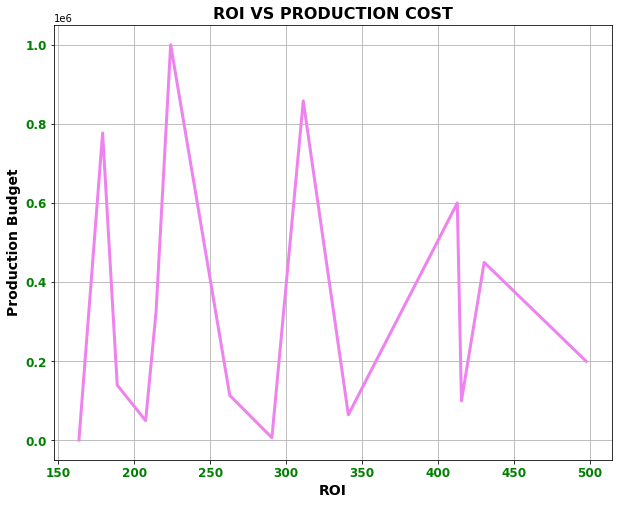

In [211]:

# Plot the lineplot
sns.lineplot(x='ROI', y='production_budget', data=sorted_cost, color='violet', linewidth=3)


# Add labels and title
plt.xlabel('ROI', fontsize=14, fontweight='bold')
plt.ylabel('Production Budget', fontsize=14, fontweight='bold')
plt.title('ROI VS PRODUCTION COST', fontsize=16, fontweight='bold')

# setting the font size, font weight, and color for the x-axis and y-axis tick labels.
plt.xticks( fontsize = 12, fontweight = 'bold', color = 'green')
plt.yticks( fontsize = 12, fontweight = 'bold', color = 'green')

#I've added a grid to the plot using the plt.grid() function
plt.grid(True) 
plt.gcf().set_size_inches(10, 8)    

      
plt.show()

<span style="color:violet">

# Explanation of my finding from the above graph.


- The aforementioned graph makes it abundantly evident that there is no linear relationship between production costs and return on investment. In order to forecast and affect the ROI when it comes to the creation of high-quality movies, I would strongly advise the Microsoft team to examine additional crucial criteria including movie genre, market penetration strategies and visibility.

<span style="color:violet">

# ANALYSIS OF THE GENRE COMBINATION AGAINST NUMBER OF VOTES

In [202]:
#This code creates a Pandas DataFrame named preferred_genre by grouping the numvotes column of a DataFrame df3 by the genres column.
#The iloc method is used to select the top 15 rows of the sorted DataFrame.

preferred_genre = pd.DataFrame(df3.groupby('genres')['numvotes'].mean()).sort_values( by = 'numvotes', ascending = False).iloc[:15]
preferred_genre

,numvotes
genres,
"Action,Thriller",1387769.000
"Drama,Western",1211405.000
"Biography,Crime,Drama",1035358.000
"Mystery,Thriller",1005960.000
"Adventure,Drama,Sci-Fi",989725.000
"Drama,Mystery,Thriller",761592.000
"Adventure,Family,Fantasy",719629.000
"Drama,Sci-Fi,Thriller",710018.000
"Biography,Comedy,Drama",677343.000


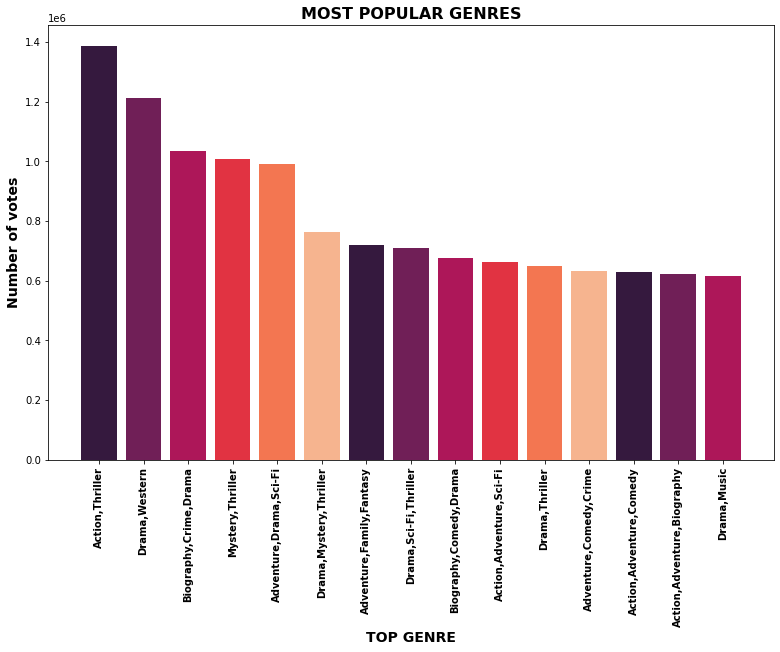

In [219]:
# Create a bar plot of the top genre against the number of votes

plt.figure(figsize=(13, 8))
plt.xticks(rotation=90, fontsize=10, fontweight= 'bold')
plt.title('MOST POPULAR GENRES', fontsize=16, fontweight='bold')
plt.xlabel('TOP GENRE', fontsize=14, fontweight='bold')
plt.ylabel('Number of votes', fontsize=14, fontweight='bold')
y = preferred_genre["numvotes"]

# Create the color palette
palette = sns.color_palette("rocket")

# Create the bar plot
plt.bar(y.index, y.values, color= palette)

# Show the plot
plt.show()


<span style="color:violet">

# Explanation of my finding from the above graph.


- The top 3 most popular genres combination according to the number of votes are: (Action, Thriller), (Drama,Western) and (Biography, Crime, Drama).

- The 3 least popular genres combination according to the number of votes are:(Action, Adventure, Comedy), (Action, Adventure, Biography) and (Drama,Music)

<span style="color:violet">

### ANALYSIS OF TOP RATED MOVIE DIRECTORS 

- The below analysis, I analyzed top rated movie cast and producers that have had an average movie ratings of above 8 and have produced more that 15 top rated movies worldwide.

- I used SQL to analyze the below data and extracted the essential data by joining the various tables to get the columns necessary for the analysis and sorted the data to be able to plot the below graph.



In [204]:
# importing all necessary libraries
import matplotlib.patches as mpatches

In [205]:
# Loaded my tables using the SQL to exract the directors name, average rating and number of movies produced by the producers. 

directorsName = pd.read_sql("""
      SELECT DISTINCT primary_name, COUNT(primary_name), AVG(averagerating)
      FROM directors
      JOIN persons ON directors.person_id = persons.person_id
      JOIN movie_basics ON movie_basics.movie_id = directors.movie_id
      JOIN movie_ratings ON movie_ratings.movie_id = movie_basics.movie_id
      GROUP BY primary_name
      HAVING AVG(averagerating) > 8 AND COUNT(primary_name) > 15
      ORDER BY AVG(averagerating) DESC;     
              """,conn)

In [206]:
# I created a data frame that i loaded the database called directorsNAme
Final_df = pd.DataFrame(directorsName)
Final_df

,primary_name,COUNT(primary_name),AVG(averagerating)
0,Sylvia Broeckx,28,9.000000
1,Lisa Gossels,17,9.000000
2,Erin Korbylo,28,9.000000
3,Dennis Korbylo,28,9.000000
4,Anthony Russo,30,8.246667
5,Joe Russo,31,8.180645
6,Pauli Janhunen Calderón,23,8.152174
7,Jaco Van Dormael,16,8.106250


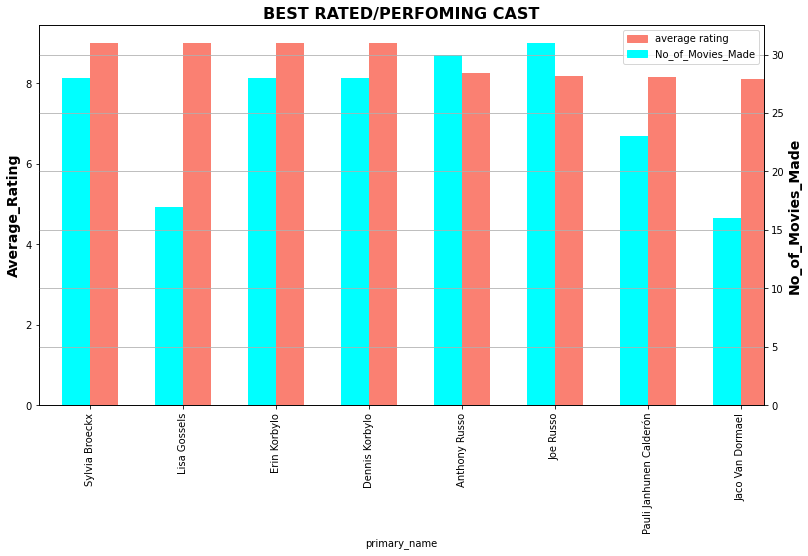

In [225]:

# Create a figure with two y-axes
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = .3

# setting the 'primary_name' as my x axis and assigning a variable popular
gr= Final_df.set_index('primary_name')

#plotting the xticks,title and the axis labels.
plt.xticks(rotation=75, fontsize=10, fontweight= 'bold')
plt.title('BEST RATED/PERFOMING CAST', fontsize=16, fontweight='bold')
ax.set_ylabel('Average_Rating', fontsize=14, fontweight='bold')
ax2.set_ylabel('No_of_Movies_Made', fontsize=14, fontweight='bold')

# Create the bar chart for the average rating
gr['AVG(averagerating)'].plot(kind='bar',color='salmon',ax=ax,width=width, position=0)

# Create the bar chart for the count of primary names
gr['COUNT(primary_name)'].plot(kind='bar',color='aqua', ax=ax2,width = width, position=1)


# Plot the legend
maroon_patch = mpatches.Patch(color='salmon', label='average rating')
blue_patch = mpatches.Patch(color='aqua', label='No_of_Movies_Made')
plt.legend(handles=[maroon_patch, blue_patch])

# Show the plot
plt.grid()
plt.show()

<span style="color:violet">

# Explanation of my finding from the above graph.

- From the above graph, we can clearly deduce that the Top 3 best rated/performing cast gauged by the number of movies produced and their average rating are:

    1.Syvia Broeckx.

    2.Dennis Korbylo
    
    3.Erin Korbylo

<span style="color:violet">

# CONCLUSION

From the above analysis of the four business problems, Microsoft may create a film production company that successfully competes with current studios and creates engaging material for audiences by implementing the following recommendations:

1. **Create a distinct brand and strategy**

Microsoft should establish a distinct brand and strategy for its upcoming film division, which should include a list of the target markets, genres, and topics it intends to emphasize. By doing this, the studio will be able to stand out in a congested market and draw in devoted customers.

2. **Employ seasoned Directors and Producers**

To run their new studio, Microsoft might think about hiring seasoned professionals with a proven track record in the film industry. In order for the studio to be successful, seasoned executives, producers, and filmmakers can contribute invaluable information and connections.

3. **Invest in high-quality content**

In order to draw viewers and favorable reviews, Microsoft should give quality content first priority. This entails investing in top-notch production values as well as recruiting great writers and directors.

4. **Establish strategic alliances and partnership**

In order to assist market and distribute their movies, Microsoft should think about forming alliances with other companies in the film business. To attract a larger audience, this can entail forming alliances with prestigious studios, distributors, or streaming platforms.

5. **Leverage, embracing the ever-changing and evolving technology**

As a technology firm, Microsoft has the chance to use technology in fresh methods to produce one-of-a-kind and captivating cinematic experiences. This can entail utilizing cutting-edge technology like virtual reality, augmented reality, or other to provide viewers with immersive experiences.